In [1]:
# APP 
from concurrent.futures import process
from matplotlib.collections import LineCollection, PolyCollection
import streamlit as st

# Data Wrangling
import numpy as np 
import pandas as pd
import re
from collections import Counter

# Time Series
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotx
from highlight_text import HighlightText, ax_text, fig_text
import plotly.io as pio
import wordcloud
from matplotlib import font_manager, gridspec
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib_venn_wordcloud import venn2_wordcloud
from PIL import Image
from scipy.cluster.hierarchy import linkage
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.figure_factory as ff


# NLP
import spacy
import nltk
from bertopic import BERTopic
from nltk.corpus import stopwords
from textblob import TextBlob
from spacy_streamlit import process_text, load_model

2022-02-08 20:18:38.663 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [4]:
def clean_df(df: pd.DataFrame):
    """
    Returns
    --------
    Cleansed pd.DataFrame

    Function drops any queries which are null and replaces null demos with Unknown. 
    Removes punctuation, extra spaces, replaces underscores and words over 14 characters.
    Removes stopwords from the corpus. 
    """
    df = (df.rename({'search':'search'}, axis=1)
            .loc[:, ['date', 'search', 'age', 'gender']]
            .dropna(subset=['search'])
            .fillna('Unknown')
            .assign(gender=lambda df: df['gender'].str.lower(),
                    date=pd.to_datetime(df['date'], format='%Y%m%d'),
                    search=lambda df: df['search'].str.replace('_', ' ')
                                                  .str.replace('(\S{14,})|[^\w\s]|  +', '') 
                                                  .str.strip()
                                                  .str.lower()))
    return df

df = pd.read_csv('raw data/demo data.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = clean_df(df)

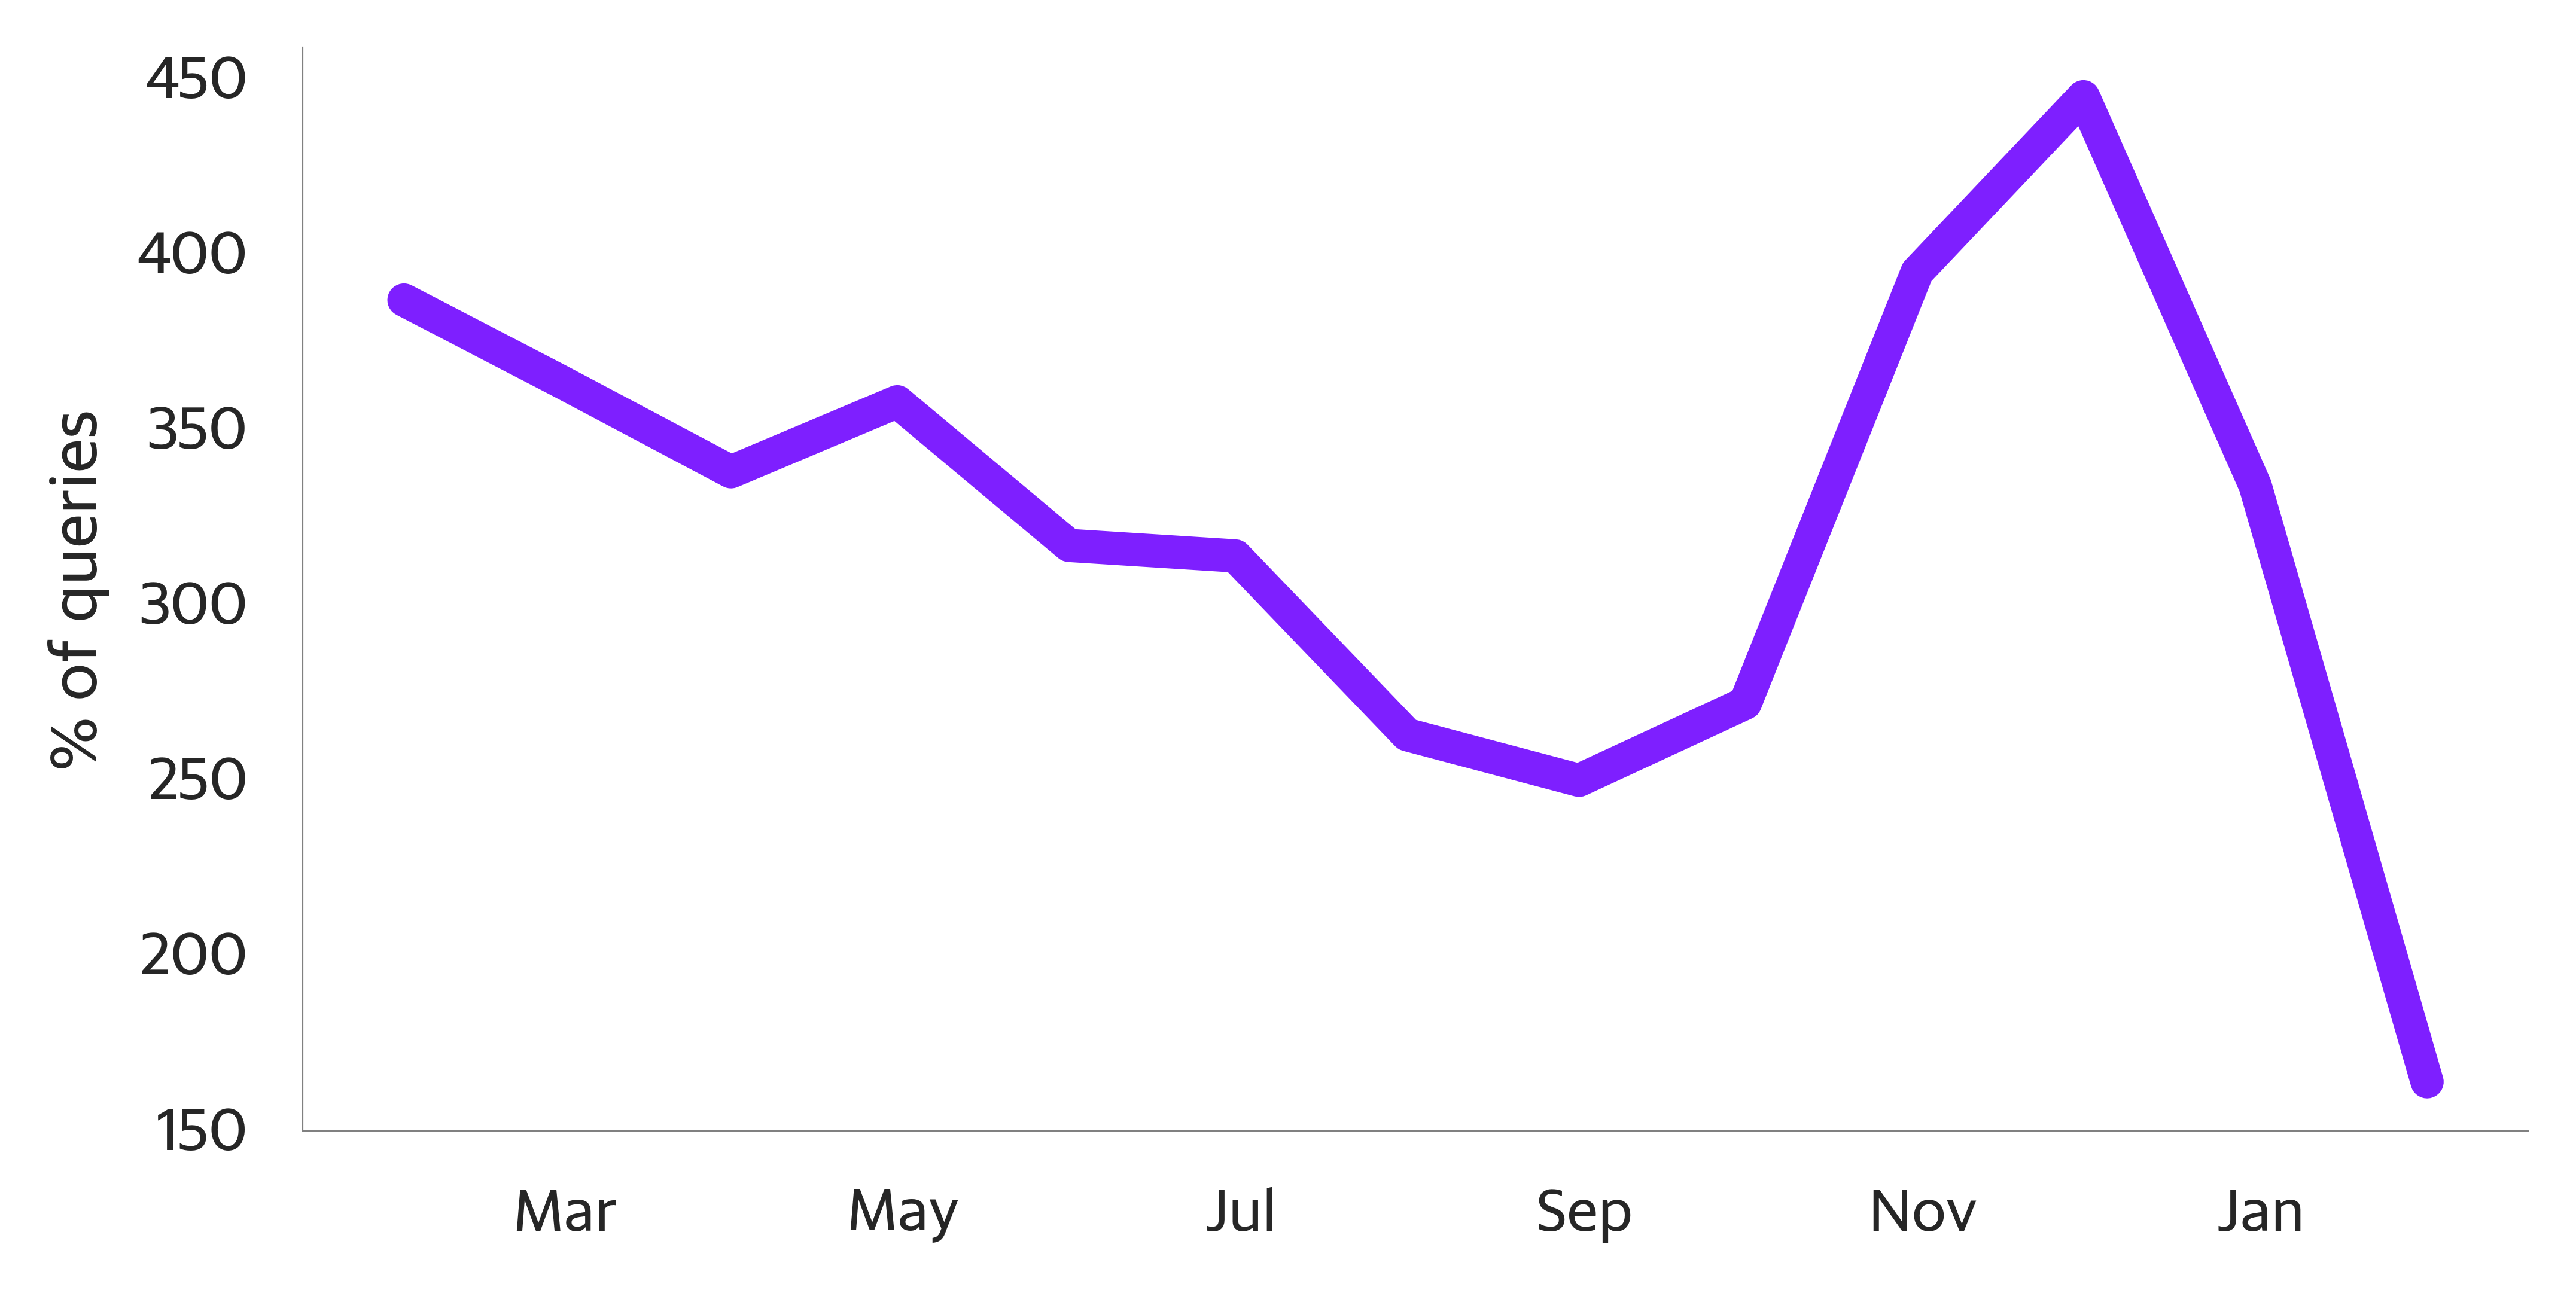

In [12]:
data = (df
        .groupby(pd.Grouper(freq='M', key='date'))
        .agg(Frequency=('search', 'size'))
       ))

sns.set(font='Yahoo Sans', style='white', context='paper')

fig, ax = plt.subplots(figsize=(6,3), dpi=100)

sns.lineplot(data=data, x='date', y='Frequency', lw=5, color='#7E1FFF', ax=ax)

# Labels
ax.set(xlabel='', ylabel='% of queries')

# Format Dates
months = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)

# Aesthetics
sns.despine()

for direction in ['bottom', 'left']:
    ax.spines[direction].set_lw(0.2)
    ax.spines[direction].set_color('grey')

# ax.set_ylim(0,None)



# # Save image into folder
# plt.savefig('../Charts/climate_searches.png', dpi=800, transparent=True)
# plt.show()